In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
print(df)

In [ ]:
#adding target in the same dataframe as data.Naming that column MEDV
df['MEDV'] = boston_dataset.target
print(df)


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [ ]:
#define X as the first 13 columns of the dataframe
X=df.iloc[:,0: 13]
print(X.shape)
#define y as the MEDV column of the dataframe
y=df['MEDV']
print(y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


(506, 13)
(506,)


In [ ]:
#function to estimate coefficients by hand
def estimate_coefficients(X,Y):
  X= np.hstack((np.ones([X.shape[0], 1]),X))
  A=np.dot(X.T,X)
  B=np.linalg.inv(A)
  C=np.dot(X.T,Y)
  return np.dot(B,C)


In [ ]:
estimated_coeffs=estimate_coefficients(X_train,y_train)
print(estimated_coeffs)

[ 3.67314628e+01 -1.19886262e-01  3.99134691e-02  2.12938504e-02
  2.77565167e+00 -1.85854960e+01  3.75579160e+00  4.57076424e-03
 -1.47064595e+00  3.11878023e-01 -1.18109903e-02 -9.47556337e-01
  1.03287982e-02 -5.50096256e-01]


In [ ]:
#using sklearn implementation just to make sure our results are the same
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

[-1.19886262e-01  3.99134691e-02  2.12938504e-02  2.77565167e+00
 -1.85854960e+01  3.75579160e+00  4.57076424e-03 -1.47064595e+00
  3.11878023e-01 -1.18109903e-02 -9.47556337e-01  1.03287982e-02
 -5.50096256e-01]
36.73146277462374


In [ ]:
#function to compute RSS
def RSS(X,y,b):
  X= np.hstack((np.ones([X.shape[0], 1]),X))
  ypredicted=np.dot(X,b)
  residual=y.flatten()-ypredicted.flatten()
  e=residual**2
  RSS=np.sum(e)
  return RSS

In [ ]:
#function to compute RSE
def RSE(X,y,b):
  A=RSS(X,y,b)
  N=len(X)
  rse=(A/(N-2))**0.5
  return rse

In [ ]:
#function to compute TSS
def TSS(y):
  mean=np.mean(y.flatten())
  tss=np.sum((y.flatten()-mean)**2)
  return tss

In [ ]:
#function to compute Rsquared
def Rsquared(X,y,b):
    rss=RSS(X,y,b)
    tss=TSS(y)
    return 1-rss/tss

In [ ]:
print('RSE for training is: ',RSE(X_train,y_train.values,estimated_coeffs))
print('RSE for testing is: ',RSE(X_test,y_test.values,estimated_coeffs))
print('RSquared for training is: ',Rsquared(X_train,y_train.values,estimated_coeffs))
print('RSquared for testing is: ',Rsquared(X_test,y_test.values,estimated_coeffs))

RSE for training is:  4.778909589643377
RSE for testing is:  3.950687092671867
RSquared for training is:  0.7375152736886281
RSquared for testing is:  0.7598135533531578


In [ ]:
#trying to repeat the procedure with 80 train 20 test
X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, test_size=0.2, random_state=42)
estimated_coeffs=estimate_coefficients(X_train80,y_train80)
print(estimated_coeffs)
print('RSE for training is: ',RSE(X_train80,y_train80.values,estimated_coeffs))
print('RSE for testing is: ',RSE(X_test20,y_test20.values,estimated_coeffs))
print('RSquared for training is: ',Rsquared(X_train80,y_train80.values,estimated_coeffs))
print('RSquared for testing is: ',Rsquared(X_test20,y_test20.values,estimated_coeffs))

[ 3.02467510e+01 -1.13055924e-01  3.01104641e-02  4.03807204e-02
  2.78443820e+00 -1.72026334e+01  4.43883520e+00 -6.29636221e-03
 -1.44786537e+00  2.62429736e-01 -1.06467863e-02 -9.15456240e-01
  1.23513347e-02 -5.08571424e-01]
RSE for training is:  4.6635910491156505
RSE for testing is:  4.977644208305385
RSquared for training is:  0.7508856358979673
RSquared for testing is:  0.6687594935355898


In [ ]:
#trying to repeat the procedure with 70 train 30 test
X_train70, X_test30, y_train70, y_test30 = train_test_split(X, y, test_size=0.3, random_state=42)
estimated_coeffs=estimate_coefficients(X_train70,y_train70)
print(estimated_coeffs)
print('RSE for training is: ',RSE(X_train70,y_train70.values,estimated_coeffs))
print('RSE for testing is: ',RSE(X_test30,y_test30.values,estimated_coeffs))
print('RSquared for training is: ',Rsquared(X_train70,y_train70.values,estimated_coeffs))
print('RSquared for testing is: ',Rsquared(X_test30,y_test30.values,estimated_coeffs))

[ 3.16310840e+01 -1.33470103e-01  3.58089136e-02  4.95226452e-02
  3.11983512e+00 -1.54170609e+01  4.05719923e+00 -1.08208352e-02
 -1.38599824e+00  2.42727340e-01 -8.70223437e-03 -9.10685208e-01
  1.17941159e-02 -5.47113313e-01]
RSE for training is:  4.761678361046082
RSE for testing is:  4.669512125221699
RSquared for training is:  0.7434997532004697
RSquared for testing is:  0.711226005748499


In [ ]:
#trying to repeat the procedure with 60 train 40 test
X_train60, X_test40, y_train60, y_test40 = train_test_split(X, y, test_size=0.4, random_state=42)
estimated_coeffs=estimate_coefficients(X_train60,y_train60)
print(estimated_coeffs)
print('RSE for training is: ',RSE(X_train60,y_train60.values,estimated_coeffs))
print('RSE for testing is: ',RSE(X_test40,y_test40.values,estimated_coeffs))
print('RSquared for training is: ',Rsquared(X_train60,y_train60.values,estimated_coeffs))
print('RSquared for testing is: ',Rsquared(X_test40,y_test40.values,estimated_coeffs))

[ 3.43302608e+01 -1.13498178e-01  3.79976868e-02  2.99876109e-02
  3.51131977e+00 -1.44513558e+01  3.80534175e+00 -1.79553906e-02
 -1.48968845e+00  2.53016064e-01 -1.00262729e-02 -8.86408743e-01
  1.08462004e-02 -5.75917903e-01]
RSE for training is:  4.765123359852384
RSE for testing is:  4.695737523009203
RSquared for training is:  0.747199884740759
RSquared for testing is:  0.712514093611116


In [ ]:
#Further investigation with combinations of the features
#COMBINATION 1:CRIM ZN INDUS
X=df.iloc[:,0: 3]
y=df['MEDV']
X_train70, X_test30, y_train70, y_test30 = train_test_split(X, y, test_size=0.3, random_state=42)
estimated_coeffs=estimate_coefficients(X_train70,y_train70)
print(estimated_coeffs)
print('RSE for training is: ',RSE(X_train70,y_train70.values,estimated_coeffs))
print('RSE for testing is: ',RSE(X_test30,y_test30.values,estimated_coeffs))
print('RSquared for training is: ',Rsquared(X_train70,y_train70.values,estimated_coeffs))
print('RSquared for testing is: ',Rsquared(X_test30,y_test30.values,estimated_coeffs))

[27.93267681 -0.26634139  0.04844372 -0.40825585]
RSE for training is:  8.050279908631179
RSE for testing is:  7.067843021314284
RSquared for training is:  0.266855406499796
RSquared for testing is:  0.338410117094757


In [ ]:
#Further investigation with combinations of the features
#COMBINATION 2:CHAS NOX RM
X=df.iloc[:,3: 6]
y=df['MEDV']
X_train70, X_test30, y_train70, y_test30 = train_test_split(X, y, test_size=0.3, random_state=42)
estimated_coeffs=estimate_coefficients(X_train70,y_train70)
print(estimated_coeffs)
print('RSE for training is: ',RSE(X_train70,y_train70.values,estimated_coeffs))
print('RSE for testing is: ',RSE(X_test30,y_test30.values,estimated_coeffs))
print('RSquared for training is: ',Rsquared(X_train70,y_train70.values,estimated_coeffs))
print('RSquared for testing is: ',Rsquared(X_test30,y_test30.values,estimated_coeffs))


[-16.42742559   5.98955091 -19.2342035    7.86031444]
RSE for training is:  6.267350539000195
RSE for testing is:  5.893260651052089
RSquared for training is:  0.5556392962553101
RSquared for testing is:  0.5400333283802906


In [ ]:
#Further investigation with combinations of the features
#COMBINATION 2: NOX RM AGE
X=df.iloc[:,4:7]
y=df['MEDV']
X_train70, X_test30, y_train70, y_test30 = train_test_split(X, y, test_size=0.3, random_state=42)
estimated_coeffs=estimate_coefficients(X_train70,y_train70)
print(estimated_coeffs)
print('RSE for training is: ',RSE(X_train70,y_train70.values,estimated_coeffs))
print('RSE for testing is: ',RSE(X_test30,y_test30.values,estimated_coeffs))
print('RSquared for training is: ',Rsquared(X_train70,y_train70.values,estimated_coeffs))
print('RSquared for testing is: ',Rsquared(X_test30,y_test30.values,estimated_coeffs))

[-20.73052682 -10.74170796   8.26241266  -0.03681777]
RSE for training is:  6.414888182392929
RSE for testing is:  5.855192042167783
RSquared for training is:  0.5344719487291563
RSquared for testing is:  0.5459566149511401


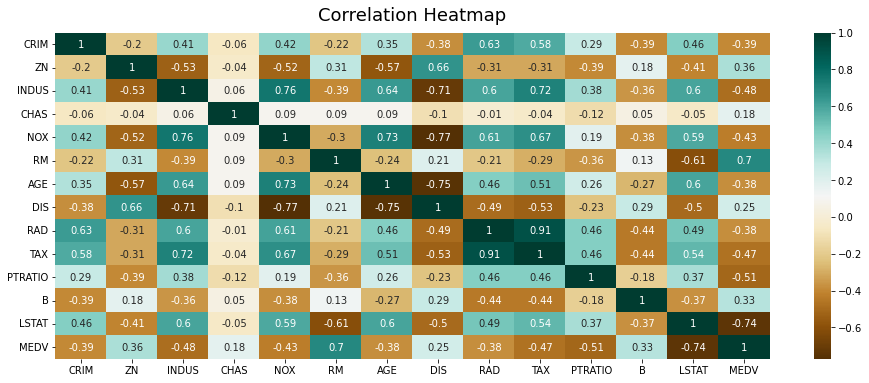

In [ ]:
#creating correlation heatmap
import seaborn as sns
plt.figure(figsize=(16, 6))
c=df.corr().round(2)
heatmap = sns.heatmap(data=c, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be croppedplt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.savefig('heatmap.png')

In [ ]:
#trying RM and LSTAT
X=df[['RM','LSTAT']]
y=df['MEDV']
X_train70, X_test30, y_train70, y_test30 = train_test_split(X, y, test_size=0.3, random_state=42)
estimated_coeffs=estimate_coefficients(X_train70,y_train70)
print(estimated_coeffs)
print('RSE for training is: ',RSE(X_train70,y_train70.values,estimated_coeffs))
print('RSE for testing is: ',RSE(X_test30,y_test30.values,estimated_coeffs))
print('RSquared for training is: ',Rsquared(X_train70,y_train70.values,estimated_coeffs))
print('RSquared for testing is: ',Rsquared(X_test30,y_test30.values,estimated_coeffs))

[-0.22886345  4.99734079 -0.67359875]
RSE for training is:  5.573058402842521
RSE for testing is:  5.496710661986856
RSquared for training is:  0.6486379416291157
RSquared for testing is:  0.5998518447715648


In [ ]:
#trying CHAS and AGE
X=df[['CHAS','AGE']]
y=df['MEDV']
X_train70, X_test30, y_train70, y_test30 = train_test_split(X, y, test_size=0.3, random_state=42)
estimated_coeffs=estimate_coefficients(X_train70,y_train70)
print(estimated_coeffs)
print('RSE for training is: ',RSE(X_train70,y_train70.values,estimated_coeffs))
print('RSE for testing is: ',RSE(X_test30,y_test30.values,estimated_coeffs))
print('RSquared for training is: ',Rsquared(X_train70,y_train70.values,estimated_coeffs))
print('RSquared for testing is: ',Rsquared(X_test30,y_test30.values,estimated_coeffs))

[31.01965287  9.25094745 -0.12621101]
RSE for training is:  8.468745529492898
RSE for testing is:  8.062650308515384
RSquared for training is:  0.18865448327063272
RSquared for testing is:  0.13906430727146735
